In [1]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./uiv_all_q_p.json') as json_file:
    uiv_all_q_p = json.load(json_file)
    
with open('./uiv_all_q.json') as json_file:
    uiv_all_q = json.load(json_file)

In [2]:
# [{}] -> [[]] 

uiv_data = []

for d in uiv_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uiv_data.append(['uiv_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in uiv_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        uiv_data.append(['uiv_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [3]:
# [[]] -> dataframe
df_uiv_data = pd.DataFrame(uiv_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [4]:
df_uiv_data['precision'].describe()

count    126.000000
mean       0.105711
std        0.082880
min        0.000000
25%        0.016667
50%        0.115734
75%        0.169116
max        0.283333
Name: precision, dtype: float64

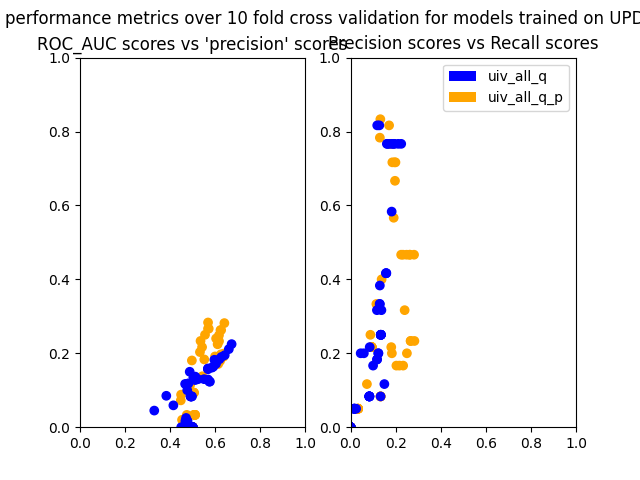

In [5]:
colors = {'uiv_all_q':'blue', 'uiv_all_q_p':'orange'}

fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot 1
ax.set_title("ROC_AUC scores vs 'precision' scores")
ax.scatter(df_uiv_data['roc_auc'], df_uiv_data['precision'], c=df_uiv_data['QuestionSet'].map(colors), label=['uiv_all_q','uiv_all_q_p'])
ax.set_xlim([0,1])
ax.set_ylim([0,1])


# plot 2
ax2.set_title("Precision scores vs Recall scores")
ax2.scatter(df_uiv_data['precision'], df_uiv_data['recall'], c=df_uiv_data['QuestionSet'].map(colors))
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

classes = ['uiv_all_q','uiv_all_q_p']
class_colours = ['blue','orange']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax2.legend(recs,classes,loc=1)

plt.suptitle("Averaged performance metrics over 10 fold cross validation for models trained on UPDRS I data")
plt.show()

In [8]:
df_uiv_data.query("roc_auc > 0.6 and precision > 0.15")

# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
0,uiv_all_q_p,GNB1,0.279503,0.612929,0.170977,0.816667
1,uiv_all_q_p,GNB2,0.280180,0.609252,0.173646,0.766667
2,uiv_all_q_p,GNB3,0.287506,0.621201,0.179019,0.766667
3,uiv_all_q_p,GNB4,0.302524,0.636275,0.190534,0.766667
4,uiv_all_q_p,GNB5,0.291679,0.620282,0.185325,0.716667
5,uiv_all_q_p,GNB6,0.304496,0.632047,0.195317,0.716667
6,uiv_all_q_p,GNB7,0.309175,0.638113,0.199200,0.716667
7,uiv_all_q_p,GNB8,0.301828,0.625245,0.197125,0.666667
10,uiv_all_q_p,LDA2,0.333175,0.640319,0.281667,0.466667
13,uiv_all_q_p,LDA8,0.309134,0.616422,0.248730,0.466667
